In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Assuming df is your dataset
df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')

C:\Users\Windows\AppData\Local\Temp\ipykernel_18984\3624181894.py:2: DtypeWarning: Columns (14,20,34,37,39,41,43,45,46,47,48,49,50,51,52,53,54,55,57,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')


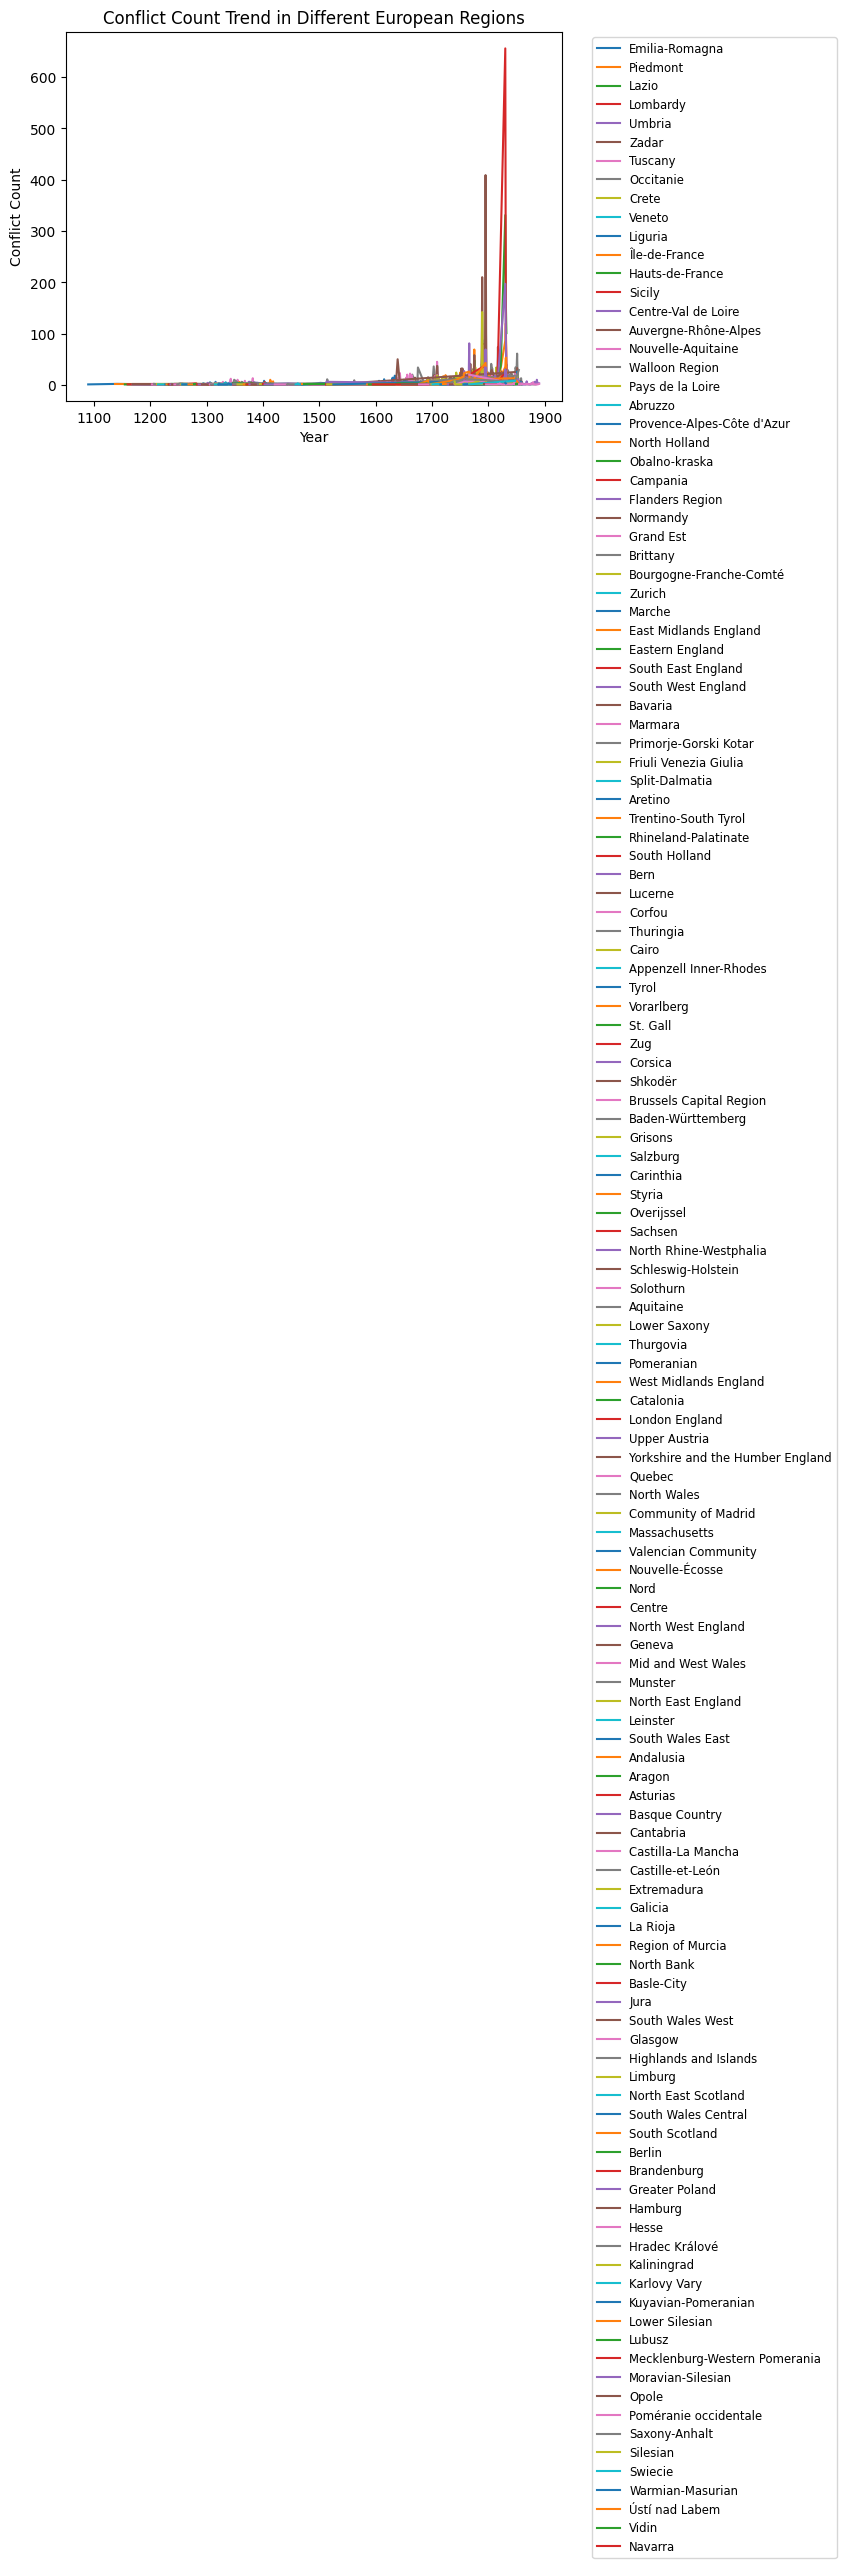

In [5]:
# Group data by year and region, and calculate the number of conflicts for each group
conflicts_by_year_region = df.groupby(['year', 'admin_level_1']).size().reset_index(name='conflict_count')

# Plot the trend of conflict counts in different regions of Europe
for region in conflicts_by_year_region['admin_level_1'].unique():
    region_data = conflicts_by_year_region[conflicts_by_year_region['admin_level_1'] == region]
    plt.plot(region_data['year'], region_data['conflict_count'], label=region)

plt.xlabel('Year')
plt.ylabel('Conflict Count')
plt.title('Conflict Count Trend in Different European Regions')


# Adjust the size of the legend
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

plt.show()

In [6]:
# Classify conflicts by type and calculate the number of conflicts every decade
df['decade'] = (df['year'] // 10) * 10
conflicts_by_decade_type = df.groupby(['decade', 'riot_type_hiscod']).size().reset_index(name='conflict_count')

# Find the most prominent conflict type in each decade
most_prominent_conflicts = conflicts_by_decade_type.loc[conflicts_by_decade_type.groupby('decade')['conflict_count'].idxmax()]
print(most_prominent_conflicts)

     decade      riot_type_hiscod  conflict_count
0    1090.0    Political conflict               1
1    1130.0    Religious conflict               1
2    1140.0    Political conflict               1
4    1150.0    Religious conflict               1
5    1160.0    Political conflict               2
..      ...                   ...             ...
360  1850.0  Other forms conflict             247
367  1860.0  Other forms conflict              10
371  1870.0  Other forms conflict              12
375  1880.0  Other forms conflict              29
378  1890.0  Other forms conflict               3

[73 rows x 3 columns]


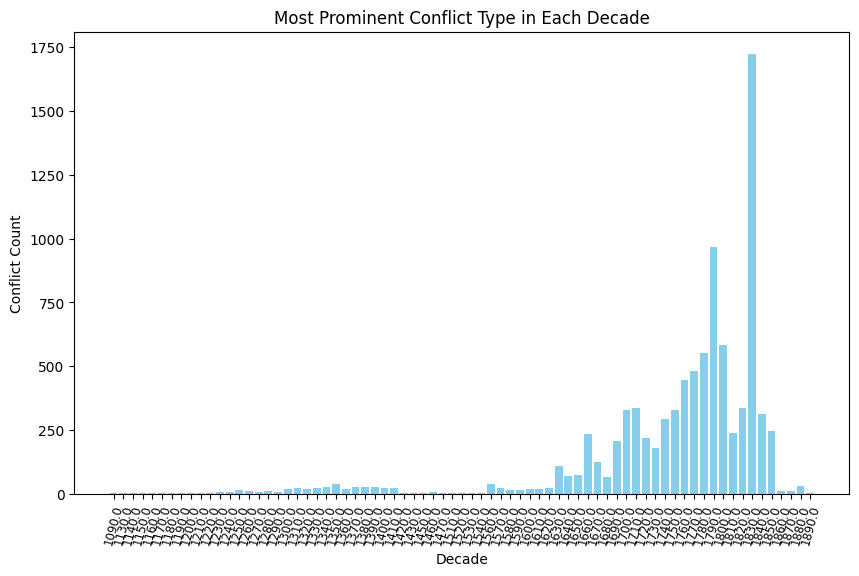

In [8]:
# Plot a bar chart of the most prominent conflict type in each decade
plt.figure(figsize=(10, 6))
plt.bar(most_prominent_conflicts['decade'].astype(str), most_prominent_conflicts['conflict_count'], color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Conflict Count')

# Adjust the size of the x-axis tick labels
plt.xticks(fontsize='small', rotation=75)
plt.title('Most Prominent Conflict Type in Each Decade')
plt.show()



In [9]:
# Convert the year to decade and century intervals
df['decade'] = (df['year'] // 10) * 10
df['century'] = (df['year'] // 100) * 100

# Classify conflicts by type and calculate the number of conflicts every decade and every century
conflicts_by_decade_type = df.groupby(['decade', 'riot_type_hiscod']).size().reset_index(name='conflict_count')
conflicts_by_century_type = df.groupby(['century', 'riot_type_hiscod']).size().reset_index(name='conflict_count')

# Find the most prominent conflict type in each decade and each century
most_prominent_conflicts_decade = conflicts_by_decade_type.loc[conflicts_by_decade_type.groupby('decade')['conflict_count'].idxmax()]
most_prominent_conflicts_century = conflicts_by_century_type.loc[conflicts_by_century_type.groupby('century')['conflict_count'].idxmax()]

# Output the results
print('Most prominent conflict type in each decade:')
print(most_prominent_conflicts_decade)
print('\nMost prominent conflict type in each century:')
print(most_prominent_conflicts_century)



Most prominent conflict type in each decade:
     decade      riot_type_hiscod  conflict_count
0    1090.0    Political conflict               1
1    1130.0    Religious conflict               1
2    1140.0    Political conflict               1
4    1150.0    Religious conflict               1
5    1160.0    Political conflict               2
..      ...                   ...             ...
360  1850.0  Other forms conflict             247
367  1860.0  Other forms conflict              10
371  1870.0  Other forms conflict              12
375  1880.0  Other forms conflict              29
378  1890.0  Other forms conflict               3

[73 rows x 3 columns]

Most prominent conflict type in each century:
    century                                 riot_type_hiscod  conflict_count
0    1000.0                               Political conflict               1
2    1100.0                               Political conflict               4
9    1200.0                               Political co


All types of conflicts:
['Tax riot' 'Feudal conflict' 'Food riot' 'Labour conflict'
 'Conflict with local and/or national authorities' 'Other forms conflict'
 'Religious conflict' 'Political conflict' nan 'Slave revolt']


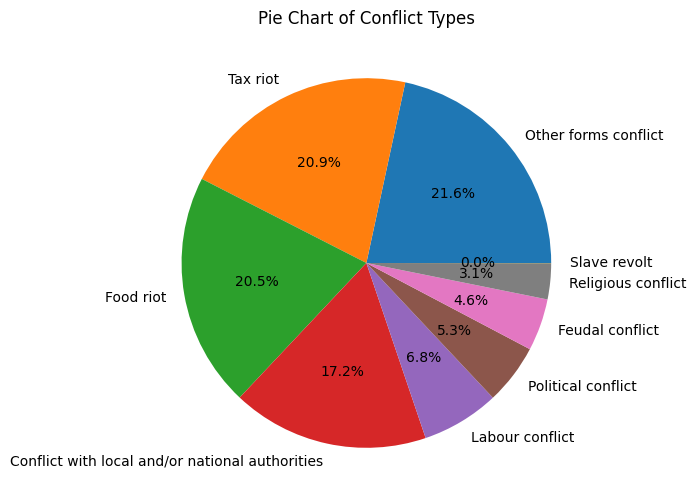

In [10]:
# Output all types of conflicts
print('\nAll types of conflicts:')
print(df['riot_type_hiscod'].unique())

conflicts_by_type = df['riot_type_hiscod'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(conflicts_by_type.values, labels=conflicts_by_type.index, autopct='%1.1f%%')
plt.title('Pie Chart of Conflict Types')
plt.show()